### **Célula para inicializar as importações que vão ser utilizadas ao decorrer das próximas células**

In [2]:
# Inicialização dos imports do modulo regressao
import sys
import os
sys.path.append(os.path.abspath(".."))  
import pandas as pd
import numpy as np
%matplotlib inline

from regressao.load_data import load_data
from regressao.model_runner import run_linear_regression
from regressao.metrics import calculate_statistics
from regressao.plot_scatter import plot_scatter

### **Célula para carregar os dados**

In [3]:
# Carregar o dataset de aerogerador
data = load_data("../data/aerogerador.dat")
data.head()

,velocidade,potencia
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


### **Célula para inicializar as variáveis independentes e dependentes**

In [4]:
X = data[["velocidade"]].values
y = data["potencia"].values

### **Célula mostrar dispersão dos dados**

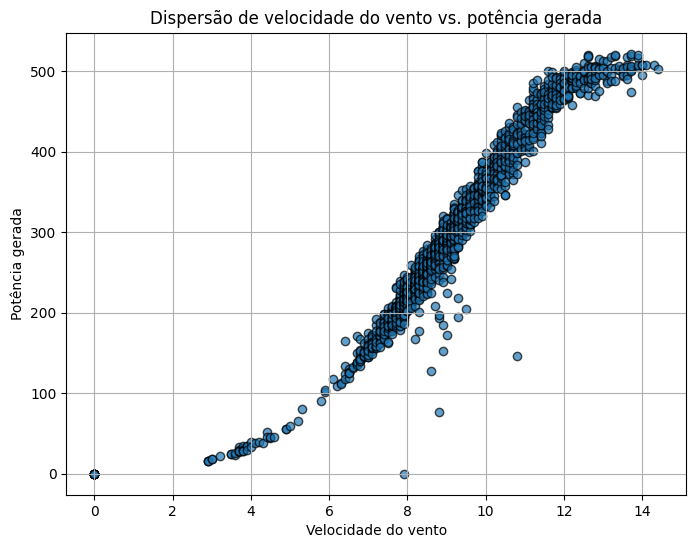

In [5]:
plot_scatter(X, y)

### **Célula responsável em treinar o modelo de regressão linear e calcular MSE e MAE**

In [4]:
# Executar múltiplas rodadas de regressão linear
metrics = run_linear_regression(X, y, n_rounds=500)

### **Célula para mostrar o resumo estatístico formatado**


In [5]:
# Calcular estatísticas para MSE e MAE
summary = {
    "MSE": calculate_statistics(metrics["MSE"]),
    "MAE": calculate_statistics(metrics["MAE"])
}

# Exibir resultados em tabela
pd.DataFrame(summary).T

,Média,Desvio-padrão,Maior valor,Menor valor
MSE,798.302141,165.195013,1371.823766,456.260910
MAE,18.402390,0.755098,20.420843,16.266246
